Objetivo específico: Determinar parâmetros gerais (n° de animais nascidos, período para nascimento e sexagem) da criação animal no biotério do ICC, total e por linhagem, nos últimos 5 anos; 

16) Quais são os principais motivos de descarte? 
Qual valor total de descarte? Qual período com maior descarte? 
Qual sexo é mais descartado? 

Hipótese: 

IMPORTANDO MINHAS BIBLIOTECAS:

In [1]:
import pandas as pd 
#import numpy as np
import matplotlib.pyplot as plt
import re as re
from textblob import TextBlob
import seaborn as sns

plt.rcParams.update({'font.size': 15}) #tamanho da fonte


CRIANDO UMA DATAFRAME E FILTRANDO DADOS QUE NÃO FAZEM PARTE DA ANÁLISE E ALTERANDO AS DATAS.

In [2]:
#Filtros para trabalhar com os dados da minha dataframe original

descarte = pd.read_csv('../../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
descarte = descarte[(descarte['obs_desc'] != 'AAA') 
            & (descarte['obs_desc'] != '666')
            & (descarte['obs_desc'] != 'Test BioterC')
            & (descarte['obs_desc'] != 'Test')
            & (descarte['num_ani'] < 200)
            & (descarte['util'] == 'desc')
            & (descarte['ling'] != 'AAA')
#             & (descarte ['m_f'] != 'AAA')
                   ]


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']

for d in datas:
    descarte[d] = pd.to_datetime(descarte[d], unit = 's')
descarte.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
66,2014-08-26 17:58:05,Tania,Swiss B,3,f,2014-04-03 04:00:00,6,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,3,0,Descarte Zootecnico,I
73,2014-09-02 12:20:36,Tania,Swiss B,1,m,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,p/ acasal.,I
95,2014-09-17 13:14:12,Tania,S129WT,2,m,2014-04-21 04:00:00,67,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Tranferencia cx,AAA
96,2014-09-17 13:14:12,Tania,S129WT,4,m,2014-06-26 04:00:00,68,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,0,Tranferencia cx,AAA
97,2014-09-17 13:14:12,Tania,S129WT,2,m,2014-07-28 04:00:00,69,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Tranferencia cx,AAA


ANALISANDO ALGUNS DADOS DA MINHA DATAFRAME ORIGINAL

In [3]:
#total de animais descartados
descarte['num_ani'].sum()

8754

In [4]:
#verificando a quantidade de entradas 'Descarte Zootécnico da série 'obs_desc'
len(descarte[descarte['obs_desc'] == 'Descarte Zootécnico'])

945

In [5]:
#não lembro desse código. - perguntar pro Guilherme e ver se posso apagar.
descarte['obs_desc'] = list(map(lambda x: str(x).strip(), descarte['obs_desc']))

In [6]:
len(descarte[descarte['obs_desc'] == 'Descarte Zootécnico'])

948

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

CONCATENAÇÕES DE MOTIVOS - 10% COM MAIS EVENTOS // 90% dos meus dados

In [7]:
#Replace erro de cadastro
descarte['obs_desc'].replace(('erro de cadastro', 
                              'erro cadastro', 'error','erro de cadastro era 1 fêmea','erro  de cadastro',
                             'erro programa','Transferencia error','erro de contagem','erro de cadatro',
                             'erro de casa','erro sexagem','Erro Cadastro', 'Erro cadastro', 'Erro cadastro',
                              'Erro de Cadastro', 'Erro no cadastro','Animais fornecidos para Fabiano Figueiredo em 15/02/2018 - Erro no sistema (Exp. já encerrado).',
                              'Erro de registro','Erro de cadastro. Eram femeas', 'Erro de sexagem', 'Erro de cadastro, não estava na cx',
                             'Erro de lançamento no bioterc', 'teste de cadastro', 'ñ encontrado na cx',
                                    'nao estava na cx', 'Erro de cadastro', 'não estava na cx', 'não foi achado animal'), 'Erro de cadastro', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [8]:
#Replace fornecido zoológico
descarte['obs_desc'].replace(('ZOO', 'fornecido Zoológico', 
                              'Fornecido zoológico', 
                              'Fornecido Zoológico', 
                              'Fornecidos Zoológico',
                             'fornecido zoológico',
                             'zoo', 'zoologico'),'Fornecido Zoológico', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [9]:
#Replace velhos
descarte['obs_desc'].replace(('velhos', 
                              'ANIMAIS VELHOS',
                             'Animais velhos',
                             'Animais Velhos',
                             'Animal velho'), 'Velhos', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [10]:
#Replace Descarte zootécnico
descarte['obs_desc'].replace(('Descarte Zootecnico', 
                              'Caixa caiu no chão > Descarte Zootécnico',
                             'Animais com idade apropriada para descarte zootécnico',
                             'descarte'), 'Descarte Zootécnico', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [11]:
#Replace monitoramento sanitário
descarte['obs_desc'].replace(('monitoramento sanitario', 
                                              'Kelly monitoramento', 'Monitoramento Sanitátio',
                                             'Monitoramento Sanitátio', 'Controle Sanitário'), 'Monitoramento Sanitátio', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [12]:
#Replace excesso de filhotes
descarte['obs_desc'].replace(('Excesso de filhotes', 'Filhotes em excesso'), 'Excesso de Filhotes', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [13]:
#Replace para acasalamento
descarte['obs_desc'].replace(('para acasalamento', 
                              'usada em acasalamento',
                             'P acasalamento experim Rosiane',
                             'Usado em acasalamento',
                             'p acasalamento',
                             'Para acasalamento 21136',
                             'Foi para o acasalamento B2',
                             'foi para acasalamento',
                             'para acasalamento 2:1',
                             'Foi para o acasalamento - Troca de macho',
                             'Usada em acasalamento',
                             'Para acasalamento 2:1',
                             'Foi encaminhada para acasalamento',
                             'Foi encaminhada para acasalamento na experimentação',
                             'Para o acasalamento 193',
                             'Usada no acasalamento 5.50',
                             'para acasalamento 3:!',
                             'Para acasalamento 25568',
                             'Usada no acasalamento 2.54',
                             'Enviado para acasalamento na experimentação.',
                             'Usada no acasalamento',
                             'femea usada em acasalamento 2:1',
                             'Para acasalamento da cesárea', 'Foi encaminhada para acasalamento na experimentação',
                                      'Foi encaminhada para acasalamento','Para Acasalamentos', 'Acasalamento Derivação Cesariana'
                            'Acasalamento Cesárea', 'Acasalamento Cesárea', 'Para acasal', 'ACASAL'), 'Para acasalamento', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [14]:
#Replace exp lorena
descarte['obs_desc'].replace('Lorena', 'Exp Lorena', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [15]:
#Replace ninhada grande
descarte['obs_desc'].replace(('ninhada grande', 'Animais |Sacrificados ninhada grande',
                                         'ninhada muito grande', 'Filhote menor na ninhada'),'Ninhada Grande', inplace=True)

In [16]:
#Replace transferencia caixa
test_lista = ['nao estavam na cx', 'Transferido para a cx 526141', 'haviam apenas 10 na cx', 'Transferido para a cx 3-1-4-74',
                                        'Transf para a cx 436', 'Transferido para a cx 21237',
                                        'Transferência de cx', 'Troca de cx', 'Transferido para cx 513143',
                                        'Transferido para a cx 512142', 'Transferidos 3 para cx 3.38',
                                        'Transferido para a cx 514144', 'transferência de cx',
                                        'Tranferencia cx', 'Transferido para cx 522150',
                                        'para outra cx', 'Trocado de cx']
descarte['obs_desc'].replace(test_lista, 'Transferencia cx', inplace=True)

In [17]:
#Replace canibalismo
descarte['obs_desc'].replace('Fêmea comeu filhotes', 'Canibalismo',inplace=True)

In [18]:
descarte['m_f'].value_counts()

m      983
f      961
AAA    342
Name: m_f, dtype: int64

In [19]:
descarte[descarte['m_f'] == 'm']['num_ani'].sum()

2976

In [20]:
descarte[descarte['m_f'] == 'f']['num_ani'].sum()

3035

In [21]:
descarte[descarte['m_f'] == 'AAA']['num_ani'].sum()

2743

Criada lista que vai receber todos os termos com condições;


In [22]:
#Lista com termos para pesquisa, sem a primera e ultima letra
# lista_termos_pesq = list()
# for i in lista_10por_super: #laço para que percorra na lista e itere em i
# #     print(i)
#     obs = i.split(' ') #uma nova variavel vai receber o que tem em i e separar pelos espaços
#     for j in obs:      #novo laço que vai percorrer em obs e guardar em j
#         if len(j) > 3: #condição para que os termos sejam maiores que 3 letras
#             if len(j) > 4: #condição para seja maior que 4
#                 lista_termos_pesq.append(j[1:-1]) #append= adicionando essas informações na lista_termos_pesq e que retire a primeira e ultima letra 
#             else:
#                 lista_termos_pesq.append(j[1:]) #se não só a primera.
# lista_termos_pesq

In [23]:
#Na dataframe descarte - coluna obs_desc, buscando padrões para fazer o replace de diferentes termos
#str - indica que é uma string/ contains onde buscarei o padrão / astype boleano/ e apresentando os valores dessa mesma coluna.

# termos_repetidos = dict() #criado dicionario pra armazenar os motivos e as repetições dos seus termos;

# for i in lista_termos_pesq:
#     lista_resol = list(descarte[descarte['obs_desc'].str.contains(i, regex=False).astype('bool')]['obs_desc'].value_counts().index)
#     termos_repetidos[i] = lista_resol
# # for i, j in enumerate(termos_repetidos['escart']):
# # #     print(j)
# #         if i != 2:
# #             print(j)
# termos_repetidos

In [24]:
#replace descarte zootécnico - outro formato
# descarte_z = descarte['obs_desc'].replace(termos_repetidos['escart'], 'Descarte Zootécnico', inplace=True)
# descarte_z

In [25]:
#replace encontrado morto
# morto = descarte['obs_desc'].replace(termos_repetidos['ort'], 'Encontrado Morto', inplace=True)
# morto

In [26]:
#replace animais doentes
# animais_doentes = descarte['obs_desc'].replace(termos_repetidos['oente'], 'Animais Doentes', inplace=True)
# animais_doentes

In [27]:
#o que tiver em lista_termos_pesq coloque em i e faça isso:
# for i in lista_termos_pesq:
#     descarte['obs_desc'].replace(termos_repetidos[i], 'Descarte Zootécnico', inplace=True)
# #     print(termos_repetidos[i])
#     break

FIM DAS CONCATENAÇÕES DOS 10% SUPERIORES

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

CONCATENANDO LINHAGENS - DATAFRAME ORIGINAL

In [28]:
descarte['ling'].value_counts()

Balb/c         523
S129KO         314
C57BL/6        306
C3H            174
129/SV-E       123
S129WT          89
Swiss-1 A       69
Swiss-1 B       63
Swiss-2 C       55
C57BL06WT       51
Swiss-2 B       47
Swiss-1 D       46
Swiss-2 D       46
Swiss-2 E       44
Swiss-1 E       43
Swiss-1 C       42
Swiss-2 A       41
Swiss C         31
Swiss E         30
Swiss D         28
Swiss A         28
Swiss B         25
DBA/1J          20
 S129WT         14
AG129           10
 S129KO          6
Swiss/CFW        4
Swiss/CFW A      4
Swiss/CFW D      4
Swiss/CFW B      3
Swiss/CFW C      2
Swiss-2 A        1
Name: ling, dtype: int64

In [29]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

descarte['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)
#descarte[(descarte['ling'] == '129/SV-E')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

descarte['ling'].replace(' S129KO', 'S129KO', inplace=True)
#descarte[(descarte['ling'] == 'S129KO')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

descarte['ling'].replace('C57BL06WT', 'C57BL/6', inplace=True)
#descarte[(descarte['ling'] == 'C57BL/6')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

descarte['ling'].replace(['Swiss A','Swiss/CFW', 'Swiss/CFW A'], 'Swiss-1 A', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 A')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

descarte['ling'].replace(['Swiss B','Swiss/CFW B'], 'Swiss-1 B', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 B')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

descarte['ling'].replace(['Swiss C','Swiss/CFW C'], 'Swiss-1 C', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 C')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

descarte['ling'].replace(['Swiss D','Swiss/CFW D'], 'Swiss-1 D', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 D')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

descarte['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 E')].info()
'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss-2 A' PARA 'Swiss-2 A'

descarte['ling'].replace('Swiss-2 A ', 'Swiss-2 A', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 E')].info()

In [30]:
descarte['ling'].value_counts()

Balb/c       523
C57BL/6      357
S129KO       320
129/SV-E     226
C3H          174
Swiss-1 A    105
Swiss-1 B     91
Swiss-1 D     78
Swiss-1 C     75
Swiss-1 E     73
Swiss-2 C     55
Swiss-2 B     47
Swiss-2 D     46
Swiss-2 E     44
Swiss-2 A     42
DBA/1J        20
AG129         10
Name: ling, dtype: int64

In [31]:
descarte['obs_desc'].replace('Descarte Zootécnico', 'Zootechnical Disposal', inplace=True)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
descarte['obs_desc'].replace('Fim Experimento', 'End Experiment', inplace=True)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
descarte['obs_desc'].replace('Encontrado Morto', 'Found Dead', inplace=True)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
descarte['obs_desc'].replace('Velhos', 'Old', inplace=True)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
descarte['obs_desc'].replace('Erro de cadastro', 'Registration error', inplace=True)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
descarte['obs_desc'].replace('Canibalismo', 'Cannibalism', inplace=True)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
descarte['obs_desc'].replace('Fornecido Zoológico', 'Provided Zoo', inplace=True)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
descarte['obs_desc'].replace('Para acasalamento', 'For mating', inplace=True)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
descarte['obs_desc'].replace('Animais Doentes', 'Sick Animals', inplace=True)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
descarte['obs_desc'].replace('Mudança', 'Change', inplace=True)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
descarte['obs_desc'].replace('Transferencia cx', 'Transfer box', inplace=True)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
descarte['obs_desc'].replace('Troca de Macho', 'Male Exchange', inplace=True)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
descarte['obs_desc'].replace('Monitoramento Sanitário', 'Health Monitoring', inplace=True)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
descarte['obs_desc'].replace('Ivermectina', 'Ivermectin', inplace=True)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
descarte['obs_desc'].replace('Excesso de Filhotes', 'Excess Puppies', inplace=True)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

CRIANDO UMA UNICA INSTÂNCIA --OUTROS-- PARA RESPONDER CADA PERGUNTA

In [32]:
#Lista que vai guardar meus 90% dos dados a serem analisados

lista_10por_super = list(descarte['obs_desc'].value_counts()[:18].index)
lista_10por_infer = list(descarte['obs_desc'].value_counts()[18:].index)
lista_10por_super

['Zootechnical Disposal',
 'End Experiment',
 'Found Dead',
 'Old',
 'Registration error',
 'Cannibalism',
 'Provided Zoo',
 'For mating',
 'UEL',
 'Sick Animals',
 'Change',
 'Transfer box',
 'Cascavel',
 'Male Exchange',
 'Health Monitoring',
 'Ivermectin',
 'Excess Puppies',
 'Exp Lorena']

In [33]:
#Nova DataFrame criada com os 90% dos motivos de descarte - DataFrame definitiva 
descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)] #Essa função faz uma busca do que eu tenho na minha lista dentro da minha nova dataframe

descarte_filtrada.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
66,2014-08-26 17:58:05,Tania,Swiss-1 B,3,f,2014-04-03 04:00:00,6,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,3,0,Zootechnical Disposal,I
95,2014-09-17 13:14:12,Tania,129/SV-E,2,m,2014-04-21 04:00:00,67,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Transfer box,AAA
96,2014-09-17 13:14:12,Tania,129/SV-E,4,m,2014-06-26 04:00:00,68,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,0,Transfer box,AAA
97,2014-09-17 13:14:12,Tania,129/SV-E,2,m,2014-07-28 04:00:00,69,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Transfer box,AAA
98,2014-09-17 13:14:12,Tania,129/SV-E,3,f,2014-07-28 04:00:00,70,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,3,0,Transfer box,AAA


In [34]:
#testando se as linhagens concatenadas estão na minha nova DataFrame.
descarte_filtrada['ling'].value_counts()

Balb/c       462
C57BL/6      330
S129KO       307
129/SV-E     215
C3H          159
Swiss-1 A     92
Swiss-1 B     80
Swiss-1 D     70
Swiss-1 C     64
Swiss-1 E     61
Swiss-2 C     46
Swiss-2 D     43
Swiss-2 E     41
Swiss-2 A     37
Swiss-2 B     36
DBA/1J        20
AG129          8
Name: ling, dtype: int64

In [35]:
#DataFrame 10% dos dados - que pegarei todas as informações e foi transformada em uma unica instância.

descarte_filtrada_10inf = descarte[descarte['obs_desc'].isin(lista_10por_infer)]

descarte_filtrada_10inf.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
73,2014-09-02 12:20:36,Tania,Swiss-1 B,1,m,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,p/ acasal.,I
108,2014-09-19 17:47:09,Tania,129/SV-E,2,f,2014-09-09 00:00:00,106,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,.,AAA
109,2014-09-19 17:47:09,Tania,Swiss-1 B,2,m,2014-08-08 00:00:00,107,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,.,AAA
142,2014-10-01 11:34:51,Tania,Swiss-1 E,34,AAA,1970-01-01 00:11:06,134,desc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-29 18:10:21,24,2014-10-20 18:10:21,666,666,34,24,.,AAA
143,2014-10-01 11:35:29,Tania,Swiss-1 E,24,AAA,1970-01-01 00:11:06,142,desc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-29 18:10:21,18,2014-10-20 18:10:21,666,666,24,18,.,AAA


In [36]:
#descarte_filtrada_10inf[]
test = 'm'
descarte_filtrada_10inf[descarte_filtrada_10inf['m_f']==test]['num_ani'].sum() + descarte_filtrada[descarte_filtrada['m_f']==test]['num_ani'].sum()

2976

PERGUNTA 1 - QUAL NUMERO TOTAL DE ANIMAIS DESCARTADOS POR MOTIVO DE DESCARTE?

In [37]:
#Verificando se a nova instância está na minha DataFrame e se permanece unica (Sem repetições)
descarte_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 66 to 18379
Data columns (total 28 columns):
date_hoje         2071 non-null datetime64[ns]
user              2068 non-null object
ling              2071 non-null object
num_ani           2071 non-null int64
m_f               2071 non-null object
date_nasc         2071 non-null datetime64[ns]
id_orig           2071 non-null object
util              2071 non-null object
id_solic          2071 non-null int64
data_inicio       2071 non-null datetime64[ns]
time              2071 non-null object
total_time        2071 non-null int64
doses             2071 non-null int64
data_solic        2071 non-null int64
data_forn         2071 non-null int64
data_fim          2071 non-null int64
num_m             2071 non-null int64
num_f             2071 non-null int64
date_acas         2071 non-null datetime64[ns]
date_nasc_acas    2071 non-null datetime64[ns]
num_nasc          2071 non-null int64
date_sex          2071 non-null datetime64

In [38]:
#Criando a unica instância com todas as informações a partir da DataFrame dos 10% inferiores.

#Soma total de animais
descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)] #zerando a dataframe
# ________________________________________________________________________________

outros_numtotal = descarte_filtrada_10inf.iloc[0] #buscando a posição 0 na minha dataframe e guardando numa variável do tipo série
outros_numtotal['num_ani'] = descarte_filtrada_10inf['num_ani'].sum() #somada o numero de animais da coluna 'num_ani' e guardada na coluna 'num_ani'da serie criada
outros_numtotal['obs_desc'] = 'Other reasons' #Renomeada como outros o que tem na coluna 'obs_desc'
outros_numtotal['m_f'] = 'nao'
descarte_filtrada = descarte_filtrada.append(outros_numtotal) #Adicionando nova instância na dataframe 90%.
descarte_filtrada.tail() 

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
18376,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18115,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Zootechnical Disposal,AAA
18377,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18117,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Zootechnical Disposal,AAA
18378,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18119,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Zootechnical Disposal,AAA
18379,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18121,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Zootechnical Disposal,AAA
73,2014-09-02 12:20:36,Tania,Swiss-1 B,950,nao,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,Other reasons,I


In [39]:
#Verificando se a nova instância está na minha DataFrame e se permanece unica (Sem repetições)
descarte_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 66 to 73
Data columns (total 28 columns):
date_hoje         2072 non-null datetime64[ns]
user              2069 non-null object
ling              2072 non-null object
num_ani           2072 non-null int64
m_f               2072 non-null object
date_nasc         2072 non-null datetime64[ns]
id_orig           2072 non-null object
util              2072 non-null object
id_solic          2072 non-null int64
data_inicio       2072 non-null datetime64[ns]
time              2072 non-null object
total_time        2072 non-null int64
doses             2072 non-null int64
data_solic        2072 non-null int64
data_forn         2072 non-null int64
data_fim          2072 non-null int64
num_m             2072 non-null int64
num_f             2072 non-null int64
date_acas         2072 non-null datetime64[ns]
date_nasc_acas    2072 non-null datetime64[ns]
num_nasc          2072 non-null int64
date_sex          2072 non-null datetime64[ns

In [40]:
outros_numtotal

date_hoje         2014-09-02 12:20:36
user                            Tania
ling                        Swiss-1 B
num_ani                           950
m_f                               nao
date_nasc         2014-06-10 04:00:00
id_orig                            55
util                             desc
id_solic                          666
data_inicio       1970-01-01 00:11:06
time                              AAA
total_time                        666
doses                             666
data_solic                        666
data_forn                         666
data_fim                   1409660436
num_m                             666
num_f                             666
date_acas         1970-01-01 00:11:06
date_nasc_acas    1970-01-01 00:11:06
num_nasc                          666
date_sex          1970-01-01 00:11:06
num_sex_m                         666
num_sex_f                         666
num_ani_ini                         1
num_ani_fim                         0
obs_desc    

GERANDO GRÁFICO A PARTIR DA PERGUNTA 1

In [41]:
# Zootechnical Disposal
# End of Experiment
# End Experiment
# Found Dead
# Old
# Registration error
# Cannibalism
# Provided Zoo
# For mating
# Federal University of Londrina
# Sick Animals
# Change
# Transfer box
# Rattlesnake
# Male Exchange
# Health Monitoring
# Ivermectin
# Excess Puppies
# Exp name

In [42]:
# descarte_filtrada['obs_desc'].replace('Descarte Zootécnico', 'Zootechnical Disposal', inplace=True)
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# descarte_filtrada['obs_desc'].replace('Fim Experimento', 'End Experiment', inplace=True)
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# descarte_filtrada['obs_desc'].replace('Encontrado Morto', 'Found Dead', inplace=True)
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# descarte_filtrada['obs_desc'].replace('Velhos', 'Old', inplace=True)
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# descarte_filtrada['obs_desc'].replace('Erro de cadastro', 'Registration error', inplace=True)
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# descarte_filtrada['obs_desc'].replace('Canibalismo', 'Cannibalism', inplace=True)
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# descarte_filtrada['obs_desc'].replace('Fornecido Zoológico', 'Provided Zoo', inplace=True)
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# descarte_filtrada['obs_desc'].replace('Para acasalamento', 'For mating', inplace=True)
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# descarte_filtrada['obs_desc'].replace('Animais Doentes', 'Sick Animals', inplace=True)
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# descarte_filtrada['obs_desc'].replace('Mudança', 'Change', inplace=True)
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# descarte_filtrada['obs_desc'].replace('Transferencia cx', 'Transfer box', inplace=True)
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# descarte_filtrada['obs_desc'].replace('Troca de Macho', 'Male Exchange', inplace=True)
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# descarte_filtrada['obs_desc'].replace('Monitoramento Sanitário', 'Health Monitoring', inplace=True)
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# descarte_filtrada['obs_desc'].replace('Ivermectina', 'Ivermectin', inplace=True)
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# descarte_filtrada['obs_desc'].replace('Excesso de Filhotes', 'Excess Puppies', inplace=True)

In [43]:
ver = descarte_filtrada.groupby('obs_desc')
ver.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
obs_desc,,,,,,,,,,,,,,
Cannibalism,598,48618,48618,48618,48618,48618,40873076820,74,120,254,38672,35366,598,254
Cascavel,71,14652,14652,14652,14652,14652,31989092650,14652,14652,14652,14652,14652,71,0
Change,68,16650,16650,16650,16650,16650,36393175161,16650,16650,16650,16650,16650,68,0
End Experiment,1321,100183,37704,36402,396346691090,396554643996,456731717422,205801,205811,205794,208468,209795,1321,40
Excess Puppies,180,9324,9324,9324,9324,9324,9324,14,14,126,7995,9324,180,126
Exp Lorena,47,8658,8658,8658,8658,8658,18634867230,8658,8658,8658,8658,8658,47,0
For mating,94,35298,35298,35298,35298,35298,67844901616,35298,35298,35298,35298,35298,94,24
Found Dead,859,106578,105249,105240,7587215536,7587782843,85906360623,34078,34112,34424,86681,80711,859,541
Health Monitoring,42,11322,11322,11322,11322,11322,23629513993,11322,11322,11322,11322,11322,42,4


In [44]:
csfont = {'fontname':'Arial',
         'size':10}
plt.rcParams['xtick.labelsize'] = 10 #tamanho da fonte
plt.rcParams['ytick.labelsize'] = 10 #tamanho da fonte

In [102]:
sns_desc_tot = descarte_filtrada.groupby('obs_desc').sum().sort_values(by='num_ani',ascending=False).reset_index()
sns_desc_tot

,obs_desc,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
0,Zootechnical Disposal,2986,640692,640692,640692,640692,640692,1372840893198,622737,622740,622907,636718,638704,2986,281
1,End Experiment,1321,100183,37704,36402,396346691090,396554643996,456731717422,205801,205811,205794,208468,209795,1321,40
2,Found Dead,859,106578,105249,105240,7587215536,7587782843,85906360623,34078,34112,34424,86681,80711,859,541
3,Cannibalism,598,48618,48618,48618,48618,48618,40873076820,74,120,254,38672,35366,598,254
4,Registration error,543,63445,62608,62610,4555865465,4556116741,91978216718,34677,34701,34838,55988,55982,543,228
5,Old,358,73260,73260,73260,73260,73260,155645831238,73260,73260,73260,73260,73260,358,4
6,Provided Zoo,185,47286,47286,47286,47286,47286,103855528926,46621,46621,46620,47286,46621,185,2
7,Excess Puppies,180,9324,9324,9324,9324,9324,9324,14,14,126,7995,9324,180,126
8,UEL,143,26640,26640,26640,26640,26640,55026689438,23315,23319,23315,25977,23992,143,5
9,Sick Animals,128,23976,23976,23976,23976,23976,23690697072,15331,15333,15364,21325,19336,128,75


(0.0, 3100.0)

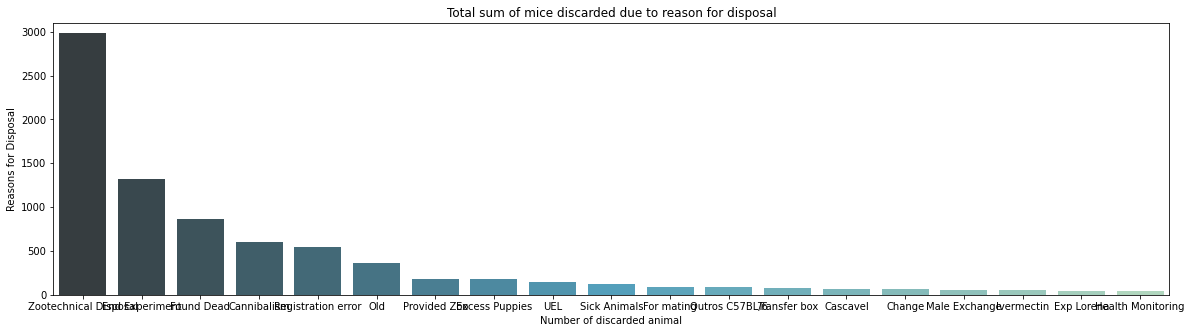

In [104]:
plt.figure(figsize=(20,5))
plt.title('Total sum of mice discarded due to reason for disposal')

sns.barplot(x='obs_desc',
    y='num_ani', palette="GnBu_d",
    data=sns_desc_tot)

#plt.legend([str(plot_media) + ' mean mouse/strain', str(plot_mediana) + ' median mouse/strain'])
plt.xlabel('Number of discarded animal') #definindo nome do eixo X
plt.ylabel('Reasons for Disposal') #definindo nome do eixo Y
plt.ylim(0,3100)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


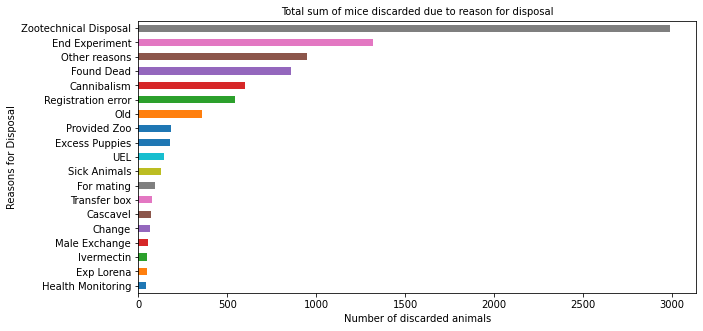

In [45]:
#testando grafico do numero total de animais.

plt.figure(figsize=(10,5))
plt.title('Total sum of mice discarded due to reason for disposal', **csfont)


plot_total_animais = descarte_filtrada.groupby('obs_desc')
plot_total_animais['num_ani'].sum().sort_values(ascending=True).plot(
    kind='barh'
)
plt.xlabel('Number of discarded animals', **csfont) #definindo nome do eixo X
plt.ylabel('Reasons for Disposal', **csfont) #definindo nome do eixo Y
# # #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# plt.savefig(
#     fname="../../resultados/numerototal_descarte_fig8a-ARTIGO.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=300, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

In [46]:
# group = descarte_filtrada.groupby('obs_desc')
# vamove = group.sum()

# vamove = list(map(lambda ingles: vamove.translate(from_lang='pt', to='en')))

# vamove

In [47]:
# term = 'm'
# descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)]
# outr_m = descarte_filtrada_10inf.iloc[0]
# outr_m['num_ani'] = descarte_filtrada_10inf[descarte_filtrada_10inf['m_f'] == term]['num_ani'].sum()
# outr_m['obs_desc'] = 'Outros Machos'
# outr_m['m_f'] = term
# descarte_filtrada = descarte_filtrada.append(outr_m)
# #descarte_filtrada[descarte_filtrada['m_f'] == term]['num_ani'].sum()
# descarte_filtrada.tail()

In [48]:
#conferindo se a instância está na minha dataframe e se não há repetições.
descarte_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 66 to 73
Data columns (total 28 columns):
date_hoje         2072 non-null datetime64[ns]
user              2069 non-null object
ling              2072 non-null object
num_ani           2072 non-null int64
m_f               2072 non-null object
date_nasc         2072 non-null datetime64[ns]
id_orig           2072 non-null object
util              2072 non-null object
id_solic          2072 non-null int64
data_inicio       2072 non-null datetime64[ns]
time              2072 non-null object
total_time        2072 non-null int64
doses             2072 non-null int64
data_solic        2072 non-null int64
data_forn         2072 non-null int64
data_fim          2072 non-null int64
num_m             2072 non-null int64
num_f             2072 non-null int64
date_acas         2072 non-null datetime64[ns]
date_nasc_acas    2072 non-null datetime64[ns]
num_nasc          2072 non-null int64
date_sex          2072 non-null datetime64[ns

In [49]:
# outr_m

In [50]:
# plt.figure(figsize=(10,5))
# plt.title('Número total de animais Machos descartados por Motivo de Descarte')

# plot_machos = descarte_filtrada[descarte_filtrada['m_f'] == 'm'].groupby('obs_desc')
# plot_machos['num_ani'].sum().sort_values(ascending=True).plot(
#     kind='barh'
# )
# plt.xlabel('Número de Animais Descartados')
# plt.ylabel('Motivos de Descarte')
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# # plt.savefig(
# #     fname="../../resultados/16_2p_numerototal_m.png", #pasta e nome do arquivo onde vai ser salvo
# #     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
# #     dpi=150, #numero de pixels da imagem?
# #     transparent=True #deixar o gráfico transparente
# # )

PERGUNTA 3 - QUAL O NUMERO TOTAL DE FÊMEAS DESCARTADAS POR MOTIVOS DE DESCARTE?

In [51]:
# term = 'f'
# descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)]
# outr_f = descarte_filtrada_10inf.iloc[0]
# outr_f['num_ani'] = descarte_filtrada_10inf[descarte_filtrada_10inf['m_f'] == term]['num_ani'].sum()
# outr_f['obs_desc'] = 'Outros Fêmeas'
# outr_f['m_f'] = term
# descarte_filtrada = descarte_filtrada.append(outr_f)
# #descarte_filtrada[descarte_filtrada['m_f'] == term]['num_ani'].sum()
# descarte_filtrada.tail()

In [52]:
# outr_f

In [53]:
test = descarte_filtrada[descarte_filtrada['m_f'] == 'f'].groupby('obs_desc')
test.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
obs_desc,,,,,,,,,,,,,,
Cascavel,28,5328,5328,5328,5328,5328,11632158348,5328,5328,5328,5328,5328,28,0
Change,30,6660,6660,6660,6660,6660,14557267843,6660,6660,6660,6660,6660,30,0
End Experiment,651,47962,14461,14043,202601976024,202722903891,221795630237,102564,102564,102564,102564,102564,651,24
Exp Lorena,22,3330,3330,3330,3330,3330,7164466337,3330,3330,3330,3330,3330,22,0
For mating,69,27972,27972,27972,27972,27972,56127429076,27972,27972,27972,27972,27972,69,15
Found Dead,81,14194,13338,13326,4575779642,4576022982,13755412470,15318,15318,15318,15318,15318,81,27
Health Monitoring,18,5994,5994,5994,5994,5994,11813701069,5994,5994,5994,5994,5994,18,4
Ivermectin,16,3330,3330,3330,3330,3330,2900570032,3330,3330,3330,3330,3330,16,5
Old,157,32634,32634,32634,32634,32634,69168492674,32634,32634,32634,32634,32634,157,2


In [54]:
# plt.figure(figsize=(10,5))
# plt.title('Número total de animais fêmeas descartadas por Motivo de Descarte')

# plot_femeas = descarte_filtrada[descarte_filtrada['m_f'] == 'f'].groupby('obs_desc')

# plot_femeas['num_ani'].sum().sort_values(ascending=True).plot(
#     kind='barh'
# )
# plt.xlabel('Número de Animais Descartados')
# plt.ylabel('Motivos de Descarte')
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# # plt.savefig(
# #     fname="../../resultados/16_3p_numerototal_f.png", #pasta e nome do arquivo onde vai ser salvo
# #     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
# #     dpi=150, #numero de pixels da imagem?
# #     transparent=True #deixar o gráfico transparente
# # )

PERGUNTA 4 - ISOGÊNICOS OU HETEROGÊNICOS SÃO MAIS DESCARTADOS POR MOTIVO DE DESCARTE?

In [55]:
# descarte_filtrada['ling'].value_counts()

++++++++++++++++++++++++++++++++++++ GRUPO ISOGÊNICO +++++++++++++++++++++++++++++++++++++++++++++++++++

In [56]:
ling_iso = ['Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129','Grupo Isogênico']

descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)]

outr_iso = descarte_filtrada_10inf.iloc[0]
outr_iso['num_ani'] = descarte_filtrada_10inf[descarte_filtrada_10inf['ling'].isin(ling_iso)]['num_ani'].sum()
outr_iso['ling'] = 'Grupo Isogênico'
outr_iso['obs_desc'] = 'Other Mice of Isogenic Strains'
outr_iso['m_f'] = 'nao'

descarte_filtrada = descarte_filtrada.append(outr_iso)
descarte_filtrada.tail()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
18376,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18115,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Zootechnical Disposal,AAA
18377,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18117,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Zootechnical Disposal,AAA
18378,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18119,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Zootechnical Disposal,AAA
18379,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18121,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Zootechnical Disposal,AAA
73,2014-09-02 12:20:36,Tania,Grupo Isogênico,471,nao,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,Other Mice of Isogenic Strains,I


In [57]:
#outr_iso

In [58]:
#conferindo se realmente meu grupo tinha sido incluido na minha DataFrame.
g_iso = descarte_filtrada[descarte_filtrada['ling'].isin(ling_iso)].groupby('ling')
g_iso.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,644,143190,143190,143190,143190,143190,296765053743,134545,134546,134570,141864,139205,644,53
AG129,15,5328,5328,5328,5328,5328,12289552737,4663,4663,4662,4663,5328,15,0
Balb/c,1765,250183,220576,219880,199896399601,200010109575,605746589578,275107,275133,275254,299068,292456,1765,274
C3H,453,105288,104564,104564,3099392148,3099393898,209102211607,91929,91935,91972,95948,103243,453,82
C57BL/6,1366,218873,218476,218464,2992208822,3002716298,354357357546,157935,157984,158196,213155,191273,1366,436
DBA/1J,44,12772,11990,11990,3113630396,3113630586,31137080914,13320,13320,13320,13320,13320,44,0
Grupo Isogênico,471,666,666,666,666,666,1409660436,666,666,666,666,666,1,0
S129KO,1056,191011,174607,174537,69743088128,69781647292,407521991435,181188,181216,181265,195186,201148,1056,151


In [59]:
#soma total de animais isogênicos descartados.
iso = descarte_filtrada[descarte_filtrada['ling'].isin(ling_iso)].groupby('obs_desc')
iso.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
obs_desc,,,,,,,,,,,,,,
Cannibalism,510,42624,42624,42624,42624,42624,36397654068,65,111,228,35993,29372,510,228
Change,68,16650,16650,16650,16650,16650,36393175161,16650,16650,16650,16650,16650,68,0
End Experiment,833,64998,18917,18135,269661547196,269824074103,305054385501,135199,135200,135198,135202,135864,833,15
Exp Lorena,47,8658,8658,8658,8658,8658,18634867230,8658,8658,8658,8658,8658,47,0
For mating,65,29304,29304,29304,29304,29304,60486424381,29304,29304,29304,29304,29304,65,12
Found Dead,615,84250,83254,83256,4626741000,4626741371,73999872038,26063,26093,26289,68674,60717,615,369
Health Monitoring,25,7992,7992,7992,7992,7992,16245875087,7992,7992,7992,7992,7992,25,4
Ivermectin,50,9990,9990,9990,9990,9990,13053417652,8660,8663,8658,8662,9990,50,9
Male Exchange,43,11322,11322,11322,11322,11322,11322,11322,11322,11322,11322,11322,43,26


In [99]:
sns_desc_iso = descarte_filtrada[descarte_filtrada['ling'].isin(ling_iso)].groupby('obs_desc').sum().sort_values(by='num_ani',ascending=False).reset_index()
sns_desc_iso

,obs_desc,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
0,Zootechnical Disposal,2061,462204,462204,462204,462204,462204,1012226751779,458879,458882,458905,460878,460881,2061,94
1,End Experiment,833,64998,18917,18135,269661547196,269824074103,305054385501,135199,135200,135198,135202,135864,833,15
2,Found Dead,615,84250,83254,83256,4626741000,4626741371,73999872038,26063,26093,26289,68674,60717,615,369
3,Cannibalism,510,42624,42624,42624,42624,42624,36397654068,65,111,228,35993,29372,510,228
4,Registration error,349,49459,48622,48624,4555851479,4556102755,75902993606,29336,29353,29435,43991,43320,349,146
5,Old,208,39960,39960,39960,39960,39960,86472060776,39960,39960,39960,39960,39960,208,0
6,UEL,143,26640,26640,26640,26640,26640,55026689438,23315,23319,23315,25977,23992,143,5
7,Provided Zoo,142,37296,37296,37296,37296,37296,81686812370,36631,36631,36630,37296,36631,142,2
8,Sick Animals,106,19980,19980,19980,19980,19980,20766380041,13330,13332,13359,17990,16002,106,61
9,Outros C57BL/6,85,666,666,666,666,666,1409660436,666,666,666,666,666,1,0


(0.0, 3000.0)

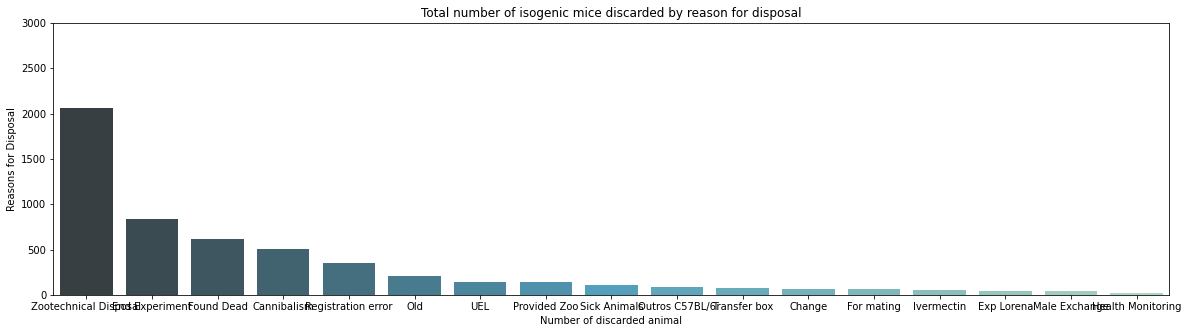

In [101]:
plt.figure(figsize=(20,5))
plt.title('Total number of isogenic mice discarded by reason for disposal')

sns.barplot(x='obs_desc',
    y='num_ani', palette="GnBu_d",
    data=sns_desc_iso)

#plt.legend([str(plot_media) + ' mean mouse/strain', str(plot_mediana) + ' median mouse/strain'])
plt.xlabel('Number of discarded animal') #definindo nome do eixo X
plt.ylabel('Reasons for Disposal') #definindo nome do eixo Y
plt.ylim(0,3000)

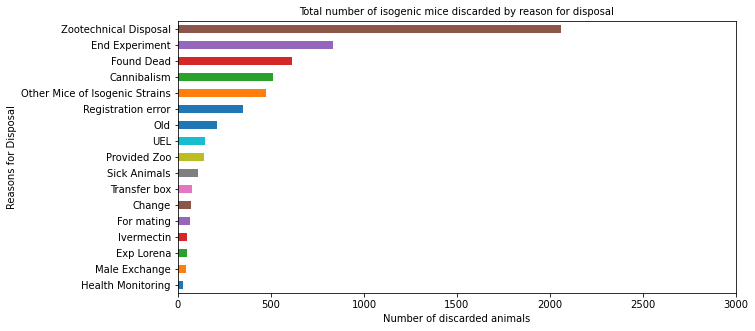

In [61]:
plt.figure(figsize=(10,5))
plt.title('Total number of isogenic mice discarded by reason for disposal', **csfont)

plot_iso = descarte_filtrada[descarte_filtrada['ling'].isin(ling_iso)].groupby('obs_desc') #agrupando por linhagem

plot_iso['num_ani'].sum().sort_values(ascending=True).plot(
    kind='barh',
        xlim=(0,3000)
)

plt.xlabel('Number of discarded animals', **csfont) #definindo nome do eixo X
plt.ylabel('Reasons for Disposal', **csfont) #definindo nome do eixo Y
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.savefig(
    fname="../../resultados/numerototal_iso_fig8b-ARTIGO.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=300, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

+++++++++++++++++++++++++++++++++ GRUPO HETEROGÊNICO ++++++++++++++++++++++++++++++++++++++++++++++

In [62]:
ling_het = ['Swiss-1 A','Swiss-1 B','Swiss-1 C','Swiss-1 D','Swiss-1 E',
           'Swiss-2 A','Swiss-2 B','Swiss-2 C','Swiss-2 D','Swiss-2 E','Grupo Heterogênico']  

descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)]

outr_het = descarte_filtrada_10inf.iloc[0]
outr_het['num_ani'] = descarte_filtrada_10inf[descarte_filtrada_10inf['ling'].isin(ling_het)]['num_ani'].sum()
outr_het['ling'] = 'Grupo Heterogênico'
outr_het['obs_desc'] = 'Other Mice of Heterogenic Strains'
outr_het['m_f'] = 'nao'

descarte_filtrada = descarte_filtrada.append(outr_het)
descarte_filtrada.tail()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingW

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
18376,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18115,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Zootechnical Disposal,AAA
18377,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18117,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Zootechnical Disposal,AAA
18378,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18119,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Zootechnical Disposal,AAA
18379,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18121,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Zootechnical Disposal,AAA
73,2014-09-02 12:20:36,Tania,Grupo Heterogênico,479,nao,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,Other Mice of Heterogenic Strains,I


In [63]:
outr_het

date_hoje                       2014-09-02 12:20:36
user                                          Tania
ling                             Grupo Heterogênico
num_ani                                         479
m_f                                             nao
date_nasc                       2014-06-10 04:00:00
id_orig                                          55
util                                           desc
id_solic                                        666
data_inicio                     1970-01-01 00:11:06
time                                            AAA
total_time                                      666
doses                                           666
data_solic                                      666
data_forn                                       666
data_fim                                 1409660436
num_m                                           666
num_f                                           666
date_acas                       1970-01-01 00:11:06
date_nasc_ac

In [64]:
#conferindo se realmente meu grupo tinha sido incluido na minha DataFrame.
g_het = descarte_filtrada[descarte_filtrada['ling'].isin(ling_het)].groupby('ling')
g_het.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
Grupo Heterogênico,479,666,666,666,666,666,1409660436,666,666,666,666,666,1,0
Swiss-1 A,374,55196,52764,52660,19353023876,19357583906,108605434317,47307,47314,47354,55308,57960,374,87
Swiss-1 B,314,49251,47968,47990,11791460764,11793290373,95544596788,46630,46633,46667,50629,52617,314,66
Swiss-1 C,330,37555,36032,35991,14725727358,14728182642,76969541725,36639,36643,36723,39309,42624,330,105
Swiss-1 D,290,41789,39980,40003,14832308808,14833952014,81926256946,39970,39973,40025,45958,46620,290,81
Swiss-1 E,301,38218,38035,37975,5740631912,5743489973,73157640115,31981,31984,32036,38637,40626,301,74
Swiss-2 A,192,21826,20075,20001,10597445708,10600516990,45409155301,19322,19322,19377,23977,23979,192,63
Swiss-2 B,144,20250,18718,18683,11930884782,11937765206,42329861929,21316,21316,21342,23313,23313,144,37
Swiss-2 C,186,26638,24096,24003,15155430980,15165969378,55850624930,26646,26646,26693,30636,29971,186,61


In [65]:
#Soma dos animais heterogênicos descartados.
descarte_filtrada[descarte_filtrada['ling'].isin(ling_het)]['num_ani'].sum()

2940

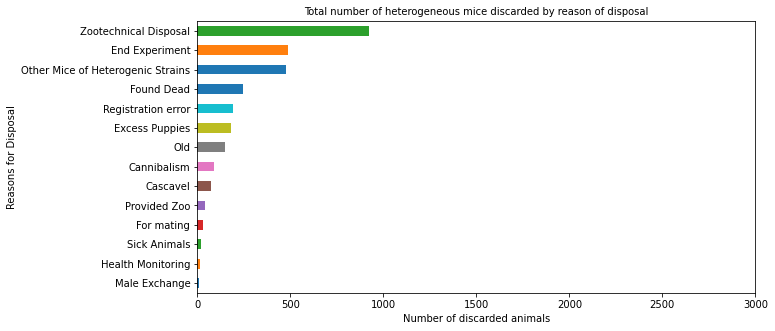

In [66]:
plt.figure(figsize=(10,5))
plt.title('Total number of heterogeneous mice discarded by reason of disposal', **csfont)

plot_het = descarte_filtrada[descarte_filtrada['ling'].isin(ling_het)].groupby('obs_desc') #agrupando por linhagem

plot_het['num_ani'].sum().sort_values(ascending=True).plot(
    kind='barh',
        xlim=(0,3000)
)
plt.xlabel('Number of discarded animals', **csfont) #definindo nome do eixo X
plt.ylabel('Reasons for Disposal', **csfont) #definindo nome do eixo Y
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.savefig(
    fname="../../resultados/numerototal_het_fig8c-ARTIGO.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=300, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

PERGUNTA 5 - QUAL A LINHAGEM MAIS DESCARTADA POR MOTIVOS DE DESCARTE ?

In [67]:
group = descarte_filtrada.groupby('ling')
group['num_ani'].sum().sort_values(ascending=False)

ling
Balb/c                1765
C57BL/6               1366
S129KO                1056
129/SV-E               644
Grupo Heterogênico     479
C3H                    453
Swiss-1 A              374
Swiss-1 C              330
Swiss-1 B              314
Swiss-1 E              301
Swiss-1 D              290
Swiss-2 A              192
Swiss-2 C              186
Swiss-2 D              179
Swiss-2 E              151
Swiss-2 B              144
DBA/1J                  44
AG129                   15
Name: num_ani, dtype: int64

In [68]:
#'Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129'//'Swiss-1 A','Swiss-2 A'
ling = 'C57BL/6'
descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)]
outros_ling = descarte_filtrada_10inf.iloc[0] 
outros_ling['num_ani'] = descarte_filtrada_10inf[descarte_filtrada_10inf['ling'] == ling]['num_ani'].sum()#somada o numero de animais da coluna 'num_ani' e guardada na coluna 'num_ani'da serie criada
outros_ling['obs_desc'] = 'Outros ' + ling  #Renomeada como outros o que tem na coluna 'obs_desc'
outros_ling['ling'] = ling
descarte_filtrada = descarte_filtrada.append(outros_ling)
descarte_filtrada.tail()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
18376,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18115,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Zootechnical Disposal,AAA
18377,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18117,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Zootechnical Disposal,AAA
18378,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18119,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Zootechnical Disposal,AAA
18379,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18121,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Zootechnical Disposal,AAA
73,2014-09-02 12:20:36,Tania,C57BL/6,85,m,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,Outros C57BL/6,I


In [69]:
# #Vendo a soma por motivo de descarte para linhagem 'S129KO' - GIOVANNY
# test_g = descarte_filtrada[descarte_filtrada['ling'] == 'C3H'].groupby('obs_desc')
# test_g.sum()

In [70]:
# descarte_filtrada[descarte_filtrada['ling'] == 'DBA/1J']['num_ani'].sum()

In [71]:
outros_ling

date_hoje         2014-09-02 12:20:36
user                            Tania
ling                          C57BL/6
num_ani                            85
m_f                                 m
date_nasc         2014-06-10 04:00:00
id_orig                            55
util                             desc
id_solic                          666
data_inicio       1970-01-01 00:11:06
time                              AAA
total_time                        666
doses                             666
data_solic                        666
data_forn                         666
data_fim                   1409660436
num_m                             666
num_f                             666
date_acas         1970-01-01 00:11:06
date_nasc_acas    1970-01-01 00:11:06
num_nasc                          666
date_sex          1970-01-01 00:11:06
num_sex_m                         666
num_sex_f                         666
num_ani_ini                         1
num_ani_fim                         0
obs_desc    

In [72]:
# #'Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129'//'Swiss-1 A','Swiss-2 A'

# #linhagens = 'C3H'
# plt.figure(figsize=(10,5))
# plt.title('Número total de linhagem descartado por motivo de descarte: '+ ling)

# plot_ling = descarte_filtrada[descarte_filtrada['ling'] == ling].groupby('obs_desc')

# plot_ling['num_ani'].sum().sort_values(ascending=True).plot(
#     kind='barh'
# )
# plt.xlabel('Número de Animais Descartados')
# plt.ylabel('Motivos de Descarte')
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# plt.savefig(
#     fname="../../resultados/16_5p_numerototal_ling.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

+++++++++++++++++++++++++++++++++++++ MACHO E FEMEA POR LINHAGENS + PRODUZIDAS ++++++++++++++++++++++++++

Motivos de descarte para Linhagem C57BL/6

In [73]:
linhagem_black = descarte_filtrada[descarte_filtrada['ling'] == 'C57BL/6']


In [74]:
linhagem_black['num_ani'].sum()

1451

In [75]:
linhagem_macho = linhagem_black[linhagem_black['m_f'] == 'm']


In [76]:
oi = linhagem_macho.groupby('obs_desc')
oi.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
obs_desc,,,,,,,,,,,,,,
Change,7,1998,1998,1998,1998,1998,4367197997,1998,1998,1998,1998,1998,7,0
Found Dead,54,9990,9990,9990,9990,9990,7607878976,9990,9990,9990,9990,9990,54,27
Health Monitoring,5,1332,1332,1332,1332,1332,2954607126,1332,1332,1332,1332,1332,5,0
Ivermectin,20,3996,3996,3996,3996,3996,4349477126,3996,3996,3996,3996,3996,20,4
Male Exchange,12,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,12,6
Old,9,2664,2664,2664,2664,2664,5785570097,2664,2664,2664,2664,2664,9,0
Outros C57BL/6,85,666,666,666,666,666,1409660436,666,666,666,666,666,1,0
Provided Zoo,4,666,666,666,666,666,1484149863,666,666,666,666,666,4,0
Registration error,14,3330,3330,3330,3330,3330,7494899366,3330,3330,3330,3330,3330,14,0


In [77]:
linhagem_femea = linhagem_black[linhagem_black['m_f'] == 'f']


In [78]:
gro = linhagem_macho.groupby('obs_desc')
gro.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
obs_desc,,,,,,,,,,,,,,
Change,7,1998,1998,1998,1998,1998,4367197997,1998,1998,1998,1998,1998,7,0
Found Dead,54,9990,9990,9990,9990,9990,7607878976,9990,9990,9990,9990,9990,54,27
Health Monitoring,5,1332,1332,1332,1332,1332,2954607126,1332,1332,1332,1332,1332,5,0
Ivermectin,20,3996,3996,3996,3996,3996,4349477126,3996,3996,3996,3996,3996,20,4
Male Exchange,12,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,12,6
Old,9,2664,2664,2664,2664,2664,5785570097,2664,2664,2664,2664,2664,9,0
Outros C57BL/6,85,666,666,666,666,666,1409660436,666,666,666,666,666,1,0
Provided Zoo,4,666,666,666,666,666,1484149863,666,666,666,666,666,4,0
Registration error,14,3330,3330,3330,3330,3330,7494899366,3330,3330,3330,3330,3330,14,0


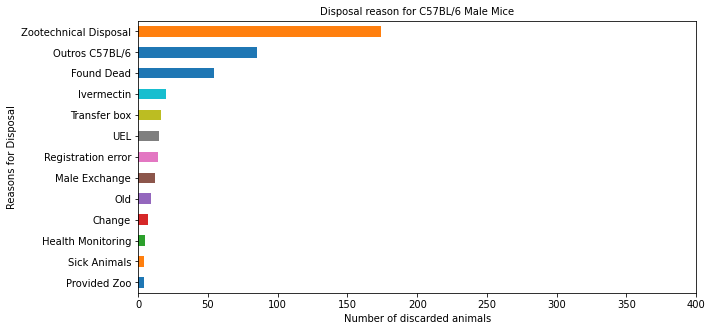

In [79]:
plt.figure(figsize=(10,5))
plt.title('Disposal reason for C57BL/6 Male Mice', **csfont)

plot_ling = linhagem_macho.groupby('obs_desc')

plot_ling['num_ani'].sum().sort_values(ascending=True).plot(
    kind='barh',
        xlim=(0,400) #ajuste de escala
)
plt.xlabel('Number of discarded animals', **csfont) #definindo nome do eixo X
plt.ylabel('Reasons for Disposal', **csfont) #definindo nome do eixo Y
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.savefig(
    fname="../../resultados/numerototal_C57_fig8a-ARTIGO.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=300, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

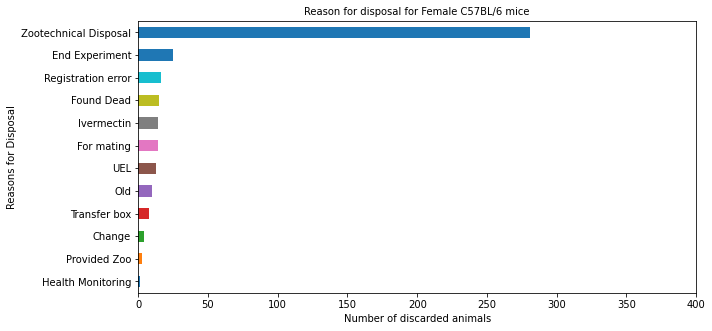

In [80]:
plt.figure(figsize=(10,5))
plt.title('Reason for disposal for Female C57BL/6 mice', **csfont)

plot_ling = linhagem_femea.groupby('obs_desc')

plot_ling['num_ani'].sum().sort_values(ascending=True).plot(
    kind='barh',
        xlim=(0,400)
)
plt.xlabel('Number of discarded animals', **csfont) #definindo nome do eixo X
plt.ylabel('Reasons for Disposal', **csfont) #definindo nome do eixo Y
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.savefig(
    fname="../../resultados/numerototal_C57_fig8b.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=300, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Motivos de descarte para Linhagem Balb/c

In [81]:
linhagem_balb = descarte_filtrada[descarte_filtrada['ling'] == 'Balb/c']

In [82]:
linhagem_m = linhagem_balb[linhagem_balb['m_f'] == 'm']

In [83]:
# agrupando = linhagem_f.groupby('obs_desc')
# agrupando['num_ani'].sum()

In [84]:
linhagem_f = linhagem_balb[linhagem_balb['m_f'] == 'f']

In [85]:
# plt.figure(figsize=(10,5))
# plt.title('Motivo de descarte para Machos de Balb/c')

# plot_ling = linhagem_m.groupby('obs_desc')

# plot_ling['num_ani'].sum().sort_values(ascending=True).plot(
#     kind='barh',
#         xlim=(0,400)
# )
# plt.xlabel('Número de Animais Descartados')
# plt.ylabel('Motivos de Descarte')
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# plt.savefig(
#     fname="../../resultados/descarte_Balb_M.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

In [86]:
# plt.figure(figsize=(10,5))
# plt.title('Motivo de descarte para Femeas de Balb/c')

# plot_ling = linhagem_f.groupby('obs_desc')

# plot_ling['num_ani'].sum().sort_values(ascending=True).plot(
#     kind='barh',
#         xlim=(0,400)
# )
# plt.xlabel('Número de Animais Descartados')
# plt.ylabel('Motivos de Descarte')
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# plt.savefig(
#     fname="../../resultados/descarte_Balb_F.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

Motivos de descarte para Linhagem Swiss

In [87]:
hetero = descarte_filtrada[descarte_filtrada['ling'].isin(ling_het)]

In [88]:
hetero_m = hetero[hetero['m_f'] == 'm']

In [89]:
hetero_f = hetero[hetero['m_f'] == 'f']

In [90]:
# plt.figure(figsize=(10,5))
# plt.title('Motivo de descarte para Femea de Swiss')

# plot_ling = hetero_f.groupby('obs_desc')

# plot_ling['num_ani'].sum().sort_values(ascending=True).plot(
#     kind='barh',
#         xlim=(0,400)
# )
# plt.xlabel('Número de Animais Descartados')
# plt.ylabel('Motivos de Descarte')
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# plt.savefig(
#     fname="../../resultados/descarte_Swiss_F.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

In [91]:
# plt.figure(figsize=(10,5))
# plt.title('Motivo de descarte para Macho de Swiss')

# plot_ling = hetero_m.groupby('obs_desc')

# plot_ling['num_ani'].sum().sort_values(ascending=True).plot(
#     kind='barh',
#         xlim=(0,400)
# )
# plt.xlabel('Número de Animais Descartados')
# plt.ylabel('Motivos de Descarte')
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# plt.savefig(
#     fname="../../resultados/descarte_Swiss_M.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

In [92]:
#Função nlargest com os parametros vai apresentar os maiores valores dentro de um limite
#Por exemplo 25 maiores valores na coluna num_ani
# descarte.nlargest(25, 'num_ani').head()